In [20]:
import cv2
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
pwd

'E:\\real-time-gesture-detection'

In [4]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('data/'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1


In [5]:
lookup

{'fist': 0, 'L': 1, 'none': 2, 'ok': 3, 'palm': 4, 'peace': 5, 'thumbsup': 6}

In [6]:
reverselookup

{0: 'fist', 1: 'L', 2: 'none', 3: 'ok', 4: 'palm', 5: 'peace', 6: 'thumbsup'}

In [7]:
x_data = []
y_data = []
datacount = 0 
 # Loop over the ten top-level folders
for j in os.listdir('data/'):
    if not j.startswith('.'): # Again avoid hidden folders
        count = 0 # To tally images of a given gesture
        for k in os.listdir('data/' + j + '/'):
                            # Loop over the images
            img = Image.open('data/' + j + '/' + k)
                            # Read in and convert to greyscale
            arr = np.array(img)
            x_data.append(arr) 
            count = count + 1
        y_values = np.full((count, 1), lookup[j]) 
        y_data.append(y_values)
        datacount = datacount + count

In [8]:
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)

In [9]:
x_data.shape

(2100, 300, 300)

In [10]:
x_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
y_data.shape

(2100, 1)

In [11]:
from tensorflow.keras.utils import to_categorical
y_data = to_categorical(y_data)

In [12]:
y_data.shape

(2100, 7)

In [13]:
x_data = x_data.reshape((datacount, 300, 300, 1))
x_data /= 255
x_data.shape

(2100, 300, 300, 1)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.1)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.6)

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [16]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(300, 300,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Train on 1890 samples, validate on 84 samples
Epoch 1/10
1890/1890 [==============================] - 9s 5ms/sample - loss: 0.9512 - accuracy: 0.7185 - val_loss: 0.1078 - val_accuracy: 0.9643
Epoch 2/10
1890/1890 [==============================] - 3s 1ms/sample - loss: 0.1365 - accuracy: 0.9651 - val_loss: 0.0622 - val_accuracy: 0.9762
Epoch 3/10
1890/1890 [==============================] - 3s 1ms/sample - loss: 0.0128 - accuracy: 0.9984 - val_loss: 0.0443 - val_accuracy: 0.9881
Epoch 4/10
1890/1890 [==============================] - 3s 1ms/sample - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/10
1890/1890 [==============================] - 3s 1ms/sample - loss: 4.5858e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 6/10
1890/1890 [==============================] - 3s 1ms/sample - loss: 1.6530e-05 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9881
Epoch 7/10
1890/1890 [==============================] - 3s 1ms/sample 

In [21]:
losses = pd.DataFrame(model.history.history)

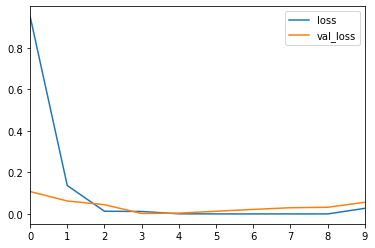

In [22]:
losses[['loss','val_loss']].plot()

In [23]:
[loss, acc] = model.evaluate(x_validate,y_validate,verbose=1)
print("Accuracy:" + str(acc))

84/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
y_validate

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
 

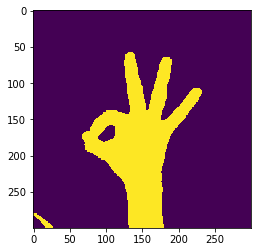

In [25]:
new = Image.open('test/4.png')
plt.imshow(new)
a = np.array(new)
a = a/255
a = a.reshape(1, 300, 300, 1)

In [26]:
result = model.predict(a)

In [27]:
result

array([[3.6563947e-08, 6.4372498e-09, 2.1947510e-13, 9.9999964e-01,
        2.6049230e-07, 5.7522175e-08, 4.2839661e-15]], dtype=float32)

In [28]:
lookup

{'fist': 0, 'L': 1, 'none': 2, 'ok': 3, 'palm': 4, 'peace': 5, 'thumbsup': 6}

In [29]:
label = {}

In [30]:
for y, x in lookup.items():
    label[x] = y

In [31]:
label

{0: 'fist', 1: 'L', 2: 'none', 3: 'ok', 4: 'palm', 5: 'peace', 6: 'thumbsup'}

In [32]:
l = np.where(result[0] == np.amax(result[0]))

In [33]:
print(label[l[0][0]])

ok


In [34]:
print(result[0][l][0])

0.99999964


In [35]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
